In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data.csv")

In [10]:
df.head(1)

,acousticness,artist_name,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,title,popularity,release_date,speechiness,tempo,valence,year
0,0.995,Carl Woitschach,0.708,158648,0.195,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.151,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.779,1928


In [12]:
df = df.drop(['artist_name','duration_ms','explicit','id','mode','title','release_date','year'], axis=1)

In [13]:
df.shape

(169909, 11)

features = df.drop(['name','id','year'], axis=1)
x = np.array(features['popularity'])
x=x/100
features = features.drop(['popularity'],axis=1)
features.insert(7, 'popularity',x)
arr_features = np.array(features)

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(arr_features)
principalDf=pd.DataFrame(data=principalComponents, columns = ['PCA1','PCA2'])

import matplotlib.pyplot as plt

X = principalDf[["PCA1","PCA2"]]

plt.figure(figsize = (10,10))
plt.scatter(X['PCA1'],X['PCA2'], c= 'blue')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

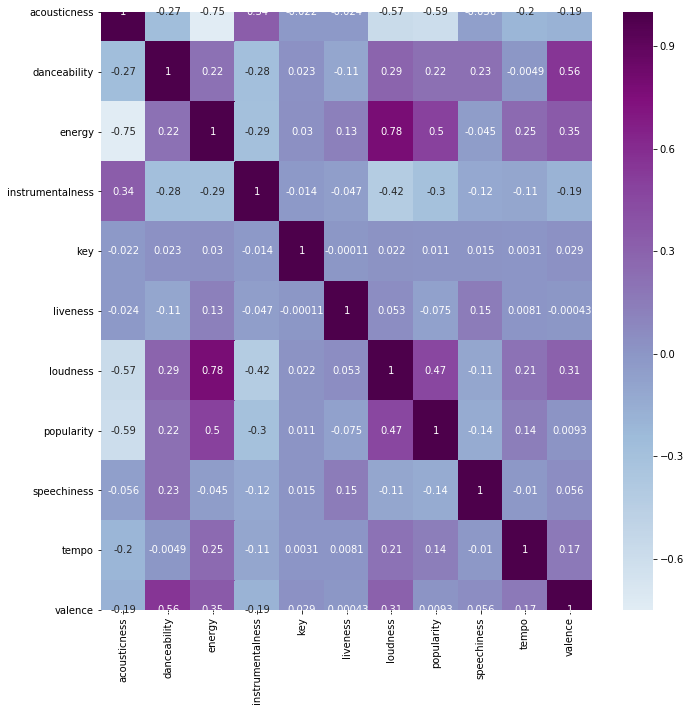

In [14]:
plt.figure(figsize=(11,11))
sns.heatmap((df.drop(['key'],axis=1)).corr(),annot=True,cmap='BuPu',center=0)